<a href="https://colab.research.google.com/github/Hsuyeon01/ESAA/blob/main/%EB%AC%B8%EC%84%9C%EA%B5%B0%EC%A7%91%ED%99%94_(11_11_%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07. 문서 군집화 소개와 실습 (Opinion Review 데이터 세트)

## 1. 문서 군집화 개념

문서 군집화 : 비슷한 텍스트 구성의 문서를 군집화 하는 것
- 동일한 군집에 속한 문서들을 같은 카테고리 소속으로 분류할 수 있으므로 텍스트 분류 기반의 문서 분류와 유사 
- 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 핑료한 데 반해, 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작

## 2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import pandas as pd
import glob, os

path = r'/content/drive/MyDrive/DATA/topics'
# path로 저장한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text=[]

# 개별 파일의 파일명은 filename_list로 취합,
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  # 개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  # 절대 경로로 주어진 파일명을 가공
  # 맨 마지막 .data 확장자도 제거 
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  # 파일명 List와 파일 내용 List에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 List와 파일 내용 list 객체를 Dataframe으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,keyboard_netbook_1005ha,...
1,interior_honda_accord_2008,...
2,gas_mileage_toyota_camry_2007,...
3,interior_toyota_camry_2007,...
4,free_bestwestern_hotel_sfo,...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range = (1,2),min_df = 0.05,max_df = 0.85)
# Opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [ ]:
document_df.head()

,filename,opinion_text,cluster_label
0,keyboard_netbook_1005ha,...,2
1,interior_honda_accord_2008,...,4
2,gas_mileage_toyota_camry_2007,...,4
3,interior_toyota_camry_2007,...,4
4,free_bestwestern_hotel_sfo,...,3


In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,accuracy_garmin_nuvi_255W_gps,...,0
14,buttons_amazon_kindle,...,0
10,directions_garmin_nuvi_255W_gps,...,0
11,display_garmin_nuvi_255W_gps,...,0
5,eyesight-issues_amazon_kindle,...,0
9,features_windows7,...,0
6,fonts_amazon_kindle,...,0
45,navigation_amazon_kindle,...,0
42,price_amazon_kindle,...,0
37,satellite_garmin_nuvi_255W_gps,...,0


In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
15,bathroom_bestwestern_hotel_sfo,...,1
40,room_holiday_inn_london,...,1
39,rooms_bestwestern_hotel_sfo,...,1
38,rooms_swissotel_chicago,...,1


In [ ]:
 document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
17,battery-life_amazon_kindle,...,2
18,battery-life_ipod_nano_8gb,...,2
16,battery-life_netbook_1005ha,...,2
0,keyboard_netbook_1005ha,...,2
43,performance_netbook_1005ha,...,2
32,screen_ipod_nano_8gb,...,2
35,screen_netbook_1005ha,...,2
29,size_asus_netbook_1005ha,...,2
28,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
27,speed_windows7,...,2


In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
8,food_holiday_inn_london,...,3
7,food_swissotel_chicago,...,3
4,free_bestwestern_hotel_sfo,...,3
48,location_bestwestern_hotel_sfo,...,3
46,location_holiday_inn_london,...,3
44,parking_bestwestern_hotel_sfo,...,3
50,price_holiday_inn_london,...,3
34,service_bestwestern_hotel_sfo,...,3
36,service_holiday_inn_london,...,3
30,service_swissotel_hotel_chicago,...,3


In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,comfort_honda_accord_2008,...,4
12,comfort_toyota_camry_2007,...,4
2,gas_mileage_toyota_camry_2007,...,4
1,interior_honda_accord_2008,...,4
3,interior_toyota_camry_2007,...,4
41,mileage_honda_accord_2008,...,4
49,performance_honda_accord_2008,...,4
47,quality_toyota_camry_2007,...,4
31,seats_honda_accord_2008,...,4
23,transmission_toyota_camry_2007,...,4


In [ ]:
# 3개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
25,staff_bestwestern_hotel_sfo,...,0
48,location_bestwestern_hotel_sfo,...,0
46,location_holiday_inn_london,...,0
44,parking_bestwestern_hotel_sfo,...,0
40,room_holiday_inn_london,...,0
39,rooms_bestwestern_hotel_sfo,...,0
38,rooms_swissotel_chicago,...,0
36,service_holiday_inn_london,...,0
34,service_bestwestern_hotel_sfo,...,0
30,service_swissotel_hotel_chicago,...,0


In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
15,bathroom_bestwestern_hotel_sfo,...,0
8,food_holiday_inn_london,...,0
7,food_swissotel_chicago,...,0
4,free_bestwestern_hotel_sfo,...,0
48,location_bestwestern_hotel_sfo,...,0
46,location_holiday_inn_london,...,0
44,parking_bestwestern_hotel_sfo,...,0
50,price_holiday_inn_london,...,0
40,room_holiday_inn_london,...,0
39,rooms_bestwestern_hotel_sfo,...,0


In [ ]:
 document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
19,accuracy_garmin_nuvi_255W_gps,...,1
17,battery-life_amazon_kindle,...,1
18,battery-life_ipod_nano_8gb,...,1
16,battery-life_netbook_1005ha,...,1
14,buttons_amazon_kindle,...,1
10,directions_garmin_nuvi_255W_gps,...,1
11,display_garmin_nuvi_255W_gps,...,1
5,eyesight-issues_amazon_kindle,...,1
9,features_windows7,...,1
6,fonts_amazon_kindle,...,1


In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,comfort_honda_accord_2008,...,2
12,comfort_toyota_camry_2007,...,2
2,gas_mileage_toyota_camry_2007,...,2
1,interior_honda_accord_2008,...,2
3,interior_toyota_camry_2007,...,2
41,mileage_honda_accord_2008,...,2
49,performance_honda_accord_2008,...,2
47,quality_toyota_camry_2007,...,2
31,seats_honda_accord_2008,...,2
23,transmission_toyota_camry_2007,...,2


## 3. 군집별 핵심 단어 추출하기

cluster_centers_ : 중심을 기준으로 얼마나 가깝게 위치해있는지
- 배열 값으로 제공되며, 행은 개별 군집, 열을 개별 피처를 의미
- 각 배열 내의 값은 개별 군집 내의 상대 위치를 숫자 값으로 표현한 일종의 좌표값

In [ ]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4611)
[[0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


- 0에서 1까지의 값을 가질 수 있으며 1에 가까울수록 중심과 가까운 값을 의미

In [ ]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names,
                        clusters_num, top_n_features=10):
  cluster_details = {}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort[:,::-1]로 구한 인덱스를 이용해 top_n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_feature_values'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']

    cluster_details[cluster_num]['filenames'] = filenames
  return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
  for cluster_num, cluster_detail in cluster_details.items():
    print('####### Cluster {0}'.format(cluster_num))
    print('Top features:', cluster_detail['top_features'])
    print('Reviews 파일명 :', cluster_detail['filenames'][:7])
    print('==================================================')

In [ ]:
feature_names = tfidf_vect.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                      feature_names=feature_names, clusters_num=3,
                                      top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : 4          free_bestwestern_hotel_sfo
7              food_swissotel_chicago
8             food_holiday_inn_london
15     bathroom_bestwestern_hotel_sfo
24            staff_swissotel_chicago
25        staff_bestwestern_hotel_sfo
30    service_swissotel_hotel_chicago
Name: filename, dtype: object
####### Cluster 1
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : 0             keyboard_netbook_1005ha
5       eyesight-issues_amazon_kindle
6                 fonts_amazon_kindle
9                   features_windows7
10    directions_garmin_nuvi_255W_gps
11       display_garmin_nuvi_255W_gps
14              buttons_amazon_kindle
Name: filename, dtype: object
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmis

# 10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge

데이트 세트의 속성

- train_id : 데이터 id
- names : 제품명
- item_condition_id : 판매자가 제공하는 제품 상태
- category_name : 카테고리명
- brand_name : 브랜드 이름
- price : 제품 가격, 예측을 위한 타깃 속성
- shipping : 배송비 무료 여부, 1이면 무료(판매자가 지불), 0이면 유료(구매자 지불)
- item_discription : 제품에 대한 설명

## 1) 데이터 전처리

In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/MyDrive/DATA/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [ ]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


- brand_name 칼럼의 경우 매우 많은 Null 값을 가짐 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


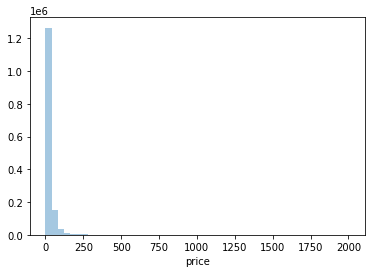

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

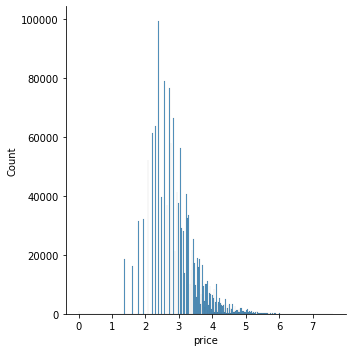

In [ ]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.displot(y_train_df, kde=False)

- 비교적 정규 분포에 가까운 데이터를 이루게 됨

In [ ]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [ ]:
print('Shipping 값 유형 : \n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형 : \n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형 : 
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형 : 
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [ ]:
boolean_cond = mercari_df['item_description'] == 'No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

- category_name: /를 기준으로 단어를 토큰화해 각각 별도의 피처로 저장하고 이를 알고리즘에 합성


In [ ]:
# apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중, 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']

# 위의 split_cat()을 apply lamba에서 호출해 대, 중, 소 칼럼을 mercari_df에 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']= zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

# 대분류만 값의 유형과 건수를 살펴보고, 중분류, 소분류는 값의 유형이 많으므로 분류 개수만 추출
print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :', mercari_df['cat_jung'].nunique())
print('소분류 개수 :', mercari_df['cat_so'].nunique()) 

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 : 114
소분류 개수 : 871


In [ ]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value='Other_Null')

In [ ]:
# 각 칼럼별로 Null 값 건수 확인
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

## 2) 피처 인코딩과 피처 벡터화 

Brand name : 상품의 브랜드명 -> 원-핫 인코딩 변환

In [ ]:
print('brand_name의 유형 건수 :', mercari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mercari_df['brand_name'].value_counts()[:5])

brand_name의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


name : 상품명 의미 -> 종류가 많음, Count 기반으로 피처 벡터화 변환 적용

In [ ]:
print('name의 유형 건수 :', mercari_df['name'].nunique())
print('name sample 5건 : \n', mercari_df['name'].value_counts()[:10])

name의 유형 건수 : 1225273
name sample 5건 : 
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


cat_dae, cat_jung, cat_so, shipping, item_condition_id -> 원-핫 인코딩 적용

item_description : 상품에 대한 간단 설명 -> 평균 문자열이 크므로 TF-IDF로 변환

In [ ]:
pd.set_option('max_colwidth', 200)

# item_description 평균 문자열 크기
print('item_description 평균 문자열 크기 : ', mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기 :  145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [ ]:
# name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

# item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape (1482535, 50000)


원-핫 인코딩 
- OneHotEncoder
- LabelBinarizer : 희소 행렬 형태의 원-핫 인코딩 변환을 지원 

개별 칼럼으로 만들어진 희소 행렬은 hstack() 함수를 이용해 결합
- 희소 행렬을 손쉽게 칼럼 레벨로 결합할 수 있게 해줌

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae  = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so  = lb_cat_so.fit_transform(mercari_df['cat_so'])

print(type(X_brand), type(X_item_cond_id), type(X_shipping)) 
print('X_brand shape:[0], X_item_cond_id shape:[1]'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:[0], X_cat_dae shape:[1]'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:[0], X_cat_so shape:[1]'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:[0], X_item_cond_id shape:[1]
X_shipping shape:[0], X_cat_dae shape:[1]
X_cat_jung shape:[0], X_cat_so shape:[1]


In [ ]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, 
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

# hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape())

# 데이터 세트가 메모리를 많이 차지하므로 사용 목적이 끝났으면 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

## 3) 릿지 회귀 모델 구축 및 평가

모델 평가 지표 : RMSLE
- RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식
- 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해서 이 방식을 도입

In [ ]:
def rmsle(y, y_pred):
  # underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred),2)))

def evaluate_org_price(y_test, preds):
  # 원본 데이터는 log1p로 변환되었으므로 exmpm1로 원복 필요
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)

  # rmsle로 RMSLE 값 추출
  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result

In [ ]:
import gc 
from  scipy.sparse import hstack

def model_train_predict(model,matrix_list):
    # scipy.sparse 모듈의 hstack 을 이용하여 희소 행렬 결합
    X= hstack(matrix_list).tocsr()     
    
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], 
                                                      test_size=0.2, random_state=156)
    
    # 모델 학습 및 예측
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    
    del X , X_train , X_test , y_train 
    gc.collect()
    
    return preds , y_test

In [ ]:
# item_description과 같은 텍스트 형태의 속성이 얼마나 영향을 미치는가
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.5023727038010556
Item Description을 포함한 rmsle 값: 0.47121951434336345


- item Description을 포함했을 때 rmsle값이 많이 감소 -> 영향이 중요함

## 4) LightGMB 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 0.4571958024426099


In [76]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.45072592143293
